# Factor Modeling

In [11]:
%matplotlib inline

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tushare as ts
from WindPy import *
import datetime
import time
import math 
from statsmodels import regression, stats
import statsmodels.api as sm

%run final_project.py

matplotlib.rcParams["figure.figsize"] = (16, 9)

In [2]:
factor_data = pd.read_pickle("factor_data.gz")

In [3]:
factor_data.head()

,WINDCODE,SEC_NAME,INDEXCODE_SW,INDUSTRY_SW,EV,PE_TTM,PB_MRQ,PS_TTM,PCF_OCF_TTM,EV2_TO_EBITDA,ROE,ROIC,PROFITTOGR,YOYPROFIT,YOY_TR,TURN,CLOSE,NEXT_RETURN
date,,,,,,,,,,,,,,,,,,
2015-01-30,000006.SZ,深振业A,801180.SI,房地产,-0.617045,-0.347699,-0.300337,-0.143852,-0.149815,-0.722205,0.583092,0.450772,0.163347,3.109612,4.219355,0.035327,6.50,1.076923
2015-01-30,000656.SZ,金科股份,801180.SI,房地产,1.080404,-0.204777,-0.201281,-0.493874,-0.101469,0.729906,-0.082358,-0.171611,-0.477644,-1.031457,-0.455024,1.119366,15.81,1.454775
2015-01-30,002517.SZ,恺英网络,801130.SI,传媒,-1.978773,-2.018092,-0.922046,-0.618857,3.600503,-1.331819,-0.865588,-0.969574,-0.967591,0.735273,-0.399847,-1.282259,14.41,0.000000
2015-01-30,600872.SH,中炬高新,801120.SI,食品饮料,-0.703419,0.019095,-0.227612,-0.179677,0.119902,0.097299,-0.508617,-0.592047,-0.398968,-0.280956,-0.467420,0.279412,12.13,9.150866
2015-01-30,002544.SZ,杰赛科技,801770.SI,通信,0.312661,1.244830,1.647766,0.078767,-1.354995,1.988484,-0.353202,-0.278221,-0.049013,0.177485,0.012524,-0.589351,28.17,3.265886


### 1. Regression
Training Data: 2015-01-01 to 2017-12-31 ; Testing Data: 2018-01-01 to 2019-04-26

In [6]:
factor_cols = ["EV", "PE_TTM", "PB_MRQ", "PS_TTM", "PCF_OCF_TTM", "EV2_TO_EBITDA", 
               "ROE", "ROIC", "PROFITTOGR", "YOYPROFIT", "YOY_TR", "TURN"]

In [4]:
# seperate the data into training and testing
train_data = factor_data["2015-01-01":"2017-12-31"]
test_data = factor_data["2018-01-01":"2019-04-26"]

In [7]:
y_train = train_data["NEXT_RETURN"]
x_train = train_data[factor_cols]
y_test = test_data["NEXT_RETURN"]
x_test = test_data[factor_cols]

In [8]:
model = sm.OLS(y_train, x_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NEXT_RETURN   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     22.46
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           2.94e-50
Time:                        12:02:43   Log-Likelihood:                -76492.
No. Observations:               18000   AIC:                         1.530e+05
Df Residuals:                   17988   BIC:                         1.531e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
EV               -1.9556      0.138    -14.190      0.000      -2.226      -1.685
PE_TTM           -0.0311      0.148     -0.210      0.834      -0.321       0.259
PB_MRQ           -0.2557      0.200     -1.277      0.202      -0.648       0.137
PS_TTM           -0.2021      0.237     -0.854      0.393      -0.666       0.262
PCF_OCF_TTM       0.0004      0.133      0.003      0.998      -0.260       0.260
EV2_TO_EBITDA    -0.2856      0.192     -1.485      0.137      -0.663       0.091
ROE               0.5913      0.376      1.574      0.116      -0.145       1.328
ROIC             -0.0886      0.379     -0.234      0.815      -0.831       0.654
PROFITTOGR       -0.0265      0.225     -0.118      0.906      -0.468       0.415
YOYPROFIT         0.2984      0.156      1.914      0.056      -0.007       0.604
YOY_TR            0.2500      0.151      1.659      0.097      -0.045       0.545
TURN             -0.6001      0.142     -4.214      0.000      -0.879      -0.321
==============================================================================
Omnibus:                    18705.512   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8728697.539
Skew:                           4.478   Prob(JB):                         0.00
Kurtosis:                     110.508   Cond. No.                         6.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Eliminate redundant factors and improve the model

In [25]:
results.pvalues.sort_values() # EV, TURN, YOYPROFIT, YOY_TR, ROE, EV2_TO_EBITDA, PB_MRQ are relatively significant

EV               1.866315e-45
TURN             2.520731e-05
YOYPROFIT        5.565941e-02
YOY_TR           9.711826e-02
ROE              1.155481e-01
EV2_TO_EBITDA    1.374344e-01
PB_MRQ           2.017018e-01
PS_TTM           3.932369e-01
ROIC             8.150154e-01
PE_TTM           8.335201e-01
PROFITTOGR       9.062579e-01
PCF_OCF_TTM      9.975490e-01
dtype: float64

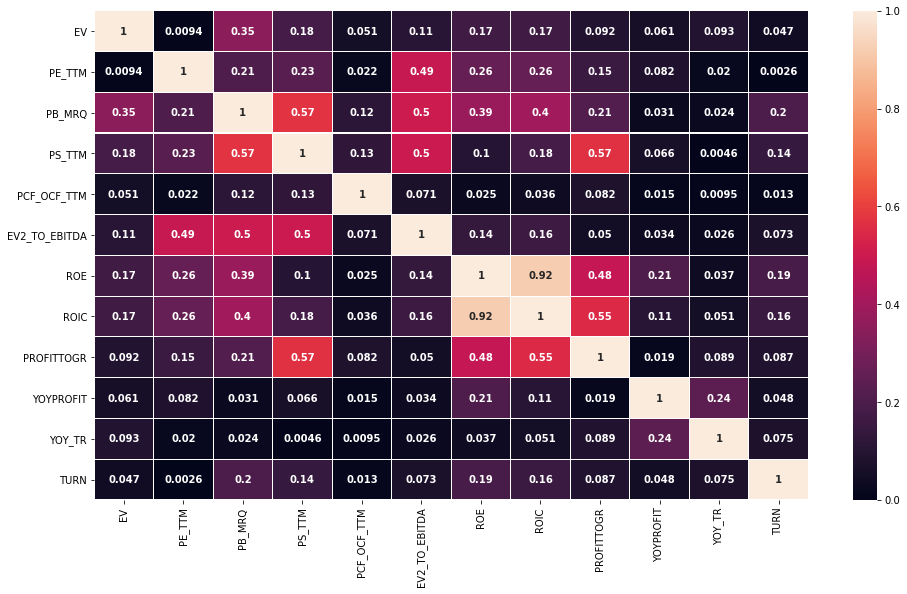

In [21]:
# see if there's multicollinearity among the factors
factors_corr = pd.DataFrame.corr(test_data.iloc[:, 4:16])
factors_corr = abs(factors_corr)
fig = plt.figure() 
ax = fig.add_subplot(figsize=(16, 16))
ax = sns.heatmap(factors_corr, linewidths=0.05, vmax=1, vmin=0, annot=True, annot_kws={'size':10,'weight':'bold'})
plt.savefig("factors_corr.png")
plt.show()
# corr(ROE, ROIC) = 0.92
# corr(PB_MRQ, PS_TTM) = 0.57
# corr(PS_TTM, PROFITTOGR) = 0.57
# corr(ROIC, PROFITTOGR) = 0.55

In [29]:
better_factors = ["EV", "PB_MRQ", "EV2_TO_EBITDA", "ROE", "YOYPROFIT", "YOY_TR", "TURN"]

In [61]:
x_train_adj = train_data[better_factors]
x_test_adj = test_data[better_factors]

In [31]:
model_adj = sm.OLS(y_train, x_train_adj)
results_adj = model_adj.fit()
results_adj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NEXT_RETURN   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     38.27
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           1.12e-53
Time:                        12:37:03   Log-Likelihood:                -76492.
No. Observations:               18000   AIC:                         1.530e+05
Df Residuals:                   17993   BIC:                         1.531e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
EV               -1.9638      0.137    -14.343      0.000      -2.232      -1.695
PB_MRQ           -0.3278      0.179     -1.834      0.067      -0.678       0.023
EV2_TO_EBITDA    -0.3699      0.166     -2.235      0.025      -0.694      -0.045
ROE               0.5170      0.167      3.087      0.002       0.189       0.845
YOYPROFIT         0.2952      0.153      1.925      0.054      -0.005       0.596
YOY_TR            0.2513      0.150      1.676      0.094      -0.043       0.545
TURN             -0.6135      0.142     -4.330      0.000      -0.891      -0.336
==============================================================================
Omnibus:                    18702.543   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8725958.519
Skew:                           4.477   Prob(JB):                         0.00
Kurtosis:                     110.492   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Build enhanced indexing strategy on the basis of model prediction

In [62]:
betas = np.mat(results_adj.params).T
x_mat = np.mat(x_test_adj)

In [80]:
score_mat = np.dot(x_mat, betas)
score_df = pd.DataFrame(score_mat, columns=["SCORE"])
score_df.index = x_test_adj.index

In [81]:
df = pd.concat([test_data.iloc[:, :4], x_test_adj, y_test, score_df], axis=1, join="outer")

In [82]:
df.head()

,WINDCODE,SEC_NAME,INDEXCODE_SW,INDUSTRY_SW,EV,PB_MRQ,EV2_TO_EBITDA,ROE,YOYPROFIT,YOY_TR,TURN,NEXT_RETURN,SCORE
date,,,,,,,,,,,,,
2018-01-31,002463.SZ,沪电股份,801080.SI,电子,-1.257991,-1.021843,-0.662752,-0.649147,0.769018,-0.670208,-0.734200,4.535147,3.223855
2018-01-31,000600.SZ,建投能源,801160.SI,公用事业,-0.813607,-0.858292,-0.497545,-0.754988,-0.312845,-0.428044,0.761674,-3.730273,1.005604
2018-01-31,002353.SZ,杰瑞股份,801890.SI,机械设备,-0.444307,-1.006737,1.068115,-1.067550,-0.776566,-1.096099,0.965932,-2.169492,-0.841785
2018-01-31,600335.SH,国机汽车,801880.SI,汽车,-0.893876,-0.789284,-0.403313,0.287645,-0.096496,-1.013930,-0.390946,-10.321970,2.268562
2018-01-31,600655.SH,豫园股份,801200.SI,商业贸易,0.271239,-0.664909,0.036490,-0.462453,0.406516,-0.336151,-0.416065,-15.230635,-0.276561


In [211]:
constituent = pd.read_pickle("csi_500_constituent_info.gz")

In [213]:
# get consitituent weights
constituent["i_weight"] = constituent["i_weight"].apply(lambda x: x / 100)
constituent.index = constituent["sec_name"]
constituent = constituent.drop(columns=["wind_code", "sec_name"])

In [247]:
dates = set(df.index)
test_return = pd.DataFrame(index=dates, columns=["NEXT_RETURN"])
test_return.sort_index()

# here we use 1 as total weight instead of specific amount
total_weight = 1

for date in dates:
    # clearing all positions and opening new positions at the end of each month
    weight_remaining = total_weight
    data = df.loc[date]
    # sort the constituent stocks by their predicted scores
    sorted_stock = data.sort_values(by=["SCORE"], ascending=False)
    weight_filled = 0
    weights = constituent # original weights in CSI 500 Index
    returns = {}
    
    for i in range(8): # don't buy the last 30 stocks
        multiplier = 1 + 0.4 * (5 - i) # put more weight on high-score stocks and vice versa
        stock_list = sorted_stock.iloc[i*10:(i+1)*10, 1]
        for stock in stock_list:
            stock_weight = weights.loc[stock].iloc[0] * multiplier
            if weight_remaining >= stock_weight: # check if the weight remaining is enough
                # record the weighted return
                returns[stock] = stock_weight * data[data["SEC_NAME"] == stock]["NEXT_RETURN"].iloc[0]
                weight_filled += stock_weight
                weight_remaining -= stock_weight
            else: # if the weight remaining is not sufficient, buy as much as we can
                returns[stock] = weight_remaining * data[data["SEC_NAME"] == stock]["NEXT_RETURN"].iloc[0]
                weight_filled += weight_remaining
                weight_remaining -= weight_remaining
                break
                
    # clean up 
    if weight_remaining > 0:
        # if there's still weight remaining
        # evenly seperated into 10 parts to buy top 10 stocks
        even_weight = weight_remaining / 10
        stock_list = sorted_stock.iloc[0:10, 1]
        for stock in stock_list:
            returns[stock] += even_weight * data[data["SEC_NAME"] == stock]["NEXT_RETURN"].iloc[0]
        weight_filled += weight_remaining
        weight_remaining -= weight_remaining
    
    else:
        break

    test_return.loc[date] = sum(returns.values()) # add up the weighted returns as portfolio's monthly return

In [249]:
test_return = test_return.sort_index()

In [250]:
test_return

,NEXT_RETURN
2018-01-31,-4.74539
2018-02-28,33.2852
2018-03-30,-4.34367
2018-04-27,1.93191
2018-05-31,-12.3262
2018-06-29,2.82897
2018-07-31,-7.71601
2018-08-31,-0.880618
2018-09-28,-11.5399
2018-10-31,10.327


In [251]:
test_return.to_pickle("test_return.gz")